In [127]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns

In [128]:
data_dir = "/Users/stuti/Downloads/5G-production-dataset/Netflix/Driving/Season3-StrangerThings"
files = os.listdir(data_dir)

dfs = []
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

In [129]:
data = pd.concat(dfs)

In [130]:
print(data.shape)

(25212, 26)


In [131]:
print(data.head())

             Timestamp  Longitude   Latitude  Speed Operatorname  CellID  \
0  2019.11.24_12.19.13  -8.388349  51.935630      0            B      12   
1  2019.11.24_12.19.13  -8.388349  51.935630      0            B      12   
2  2019.11.24_12.19.14  -8.388284  51.935597      0            B      12   
3  2019.11.24_12.19.14  -8.388284  51.935597      0            B      12   
4  2019.11.24_12.19.15  -8.388284  51.935597      0            B      12   

  NetworkMode  RSRP RSRQ  SNR  ... PINGMIN PINGMAX  PINGSTDEV  PINGLOSS  \
0          5G  -102  -14  2.0  ...       -       -          -         -   
1          5G  -102  -14  2.0  ...       -       -          -         -   
2          5G  -102  -14  2.0  ...       -       -          -         -   
3          5G  -100  -16  9.0  ...       -       -          -         -   
4          5G  -100  -16  9.0  ...       -       -          -         -   

  CELLHEX NODEHEX LACHEX RAWCELLID NRxRSRP NRxRSRQ  
0       C    A81B   9CBA  11016972   -9

In [132]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25212 entries, 0 to 3701
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     25212 non-null  object 
 1   Longitude     25212 non-null  float64
 2   Latitude      25212 non-null  float64
 3   Speed         25212 non-null  int64  
 4   Operatorname  25212 non-null  object 
 5   CellID        25212 non-null  int64  
 6   NetworkMode   25212 non-null  object 
 7   RSRP          25212 non-null  int64  
 8   RSRQ          25212 non-null  object 
 9   SNR           25212 non-null  object 
 10  CQI           25212 non-null  object 
 11  RSSI          25212 non-null  object 
 12  DL_bitrate    25212 non-null  int64  
 13  UL_bitrate    25212 non-null  int64  
 14  State         25212 non-null  object 
 15  PINGAVG       25212 non-null  object 
 16  PINGMIN       25212 non-null  object 
 17  PINGMAX       25212 non-null  object 
 18  PINGSTDEV     25212 non-nul

In [133]:
data.isnull().any()

Timestamp       False
Longitude       False
Latitude        False
Speed           False
Operatorname    False
CellID          False
NetworkMode     False
RSRP            False
RSRQ            False
SNR             False
CQI             False
RSSI            False
DL_bitrate      False
UL_bitrate      False
State           False
PINGAVG         False
PINGMIN         False
PINGMAX         False
PINGSTDEV       False
PINGLOSS        False
CELLHEX         False
NODEHEX         False
LACHEX          False
RAWCELLID       False
NRxRSRP         False
NRxRSRQ         False
dtype: bool

In [134]:
print(data.isnull().sum())

Timestamp       0
Longitude       0
Latitude        0
Speed           0
Operatorname    0
CellID          0
NetworkMode     0
RSRP            0
RSRQ            0
SNR             0
CQI             0
RSSI            0
DL_bitrate      0
UL_bitrate      0
State           0
PINGAVG         0
PINGMIN         0
PINGMAX         0
PINGSTDEV       0
PINGLOSS        0
CELLHEX         0
NODEHEX         0
LACHEX          0
RAWCELLID       0
NRxRSRP         0
NRxRSRQ         0
dtype: int64


In [135]:
print(data["NetworkMode"].value_counts())

5G       19433
LTE       4892
HSPA+      748
UMTS        96
HSUPA       43
Name: NetworkMode, dtype: int64


In [136]:
print((data["NetworkMode"].value_counts()).sum())

25212


In [137]:
nodehex = data["NODEHEX"].value_counts()
print(nodehex)

A81B     6330
A4DF     3673
A4EF     2273
432AE    2260
A9AA     1594
A99B     1219
A4E8     1006
A701      876
C         738
A992      656
A99D      501
A99E      483
AAB4      400
53BEA     345
76C6C     308
43696     282
A710      251
A707      248
3D160     215
5A5BC     200
6157E     183
A9C9      148
12D       144
534E2     128
542F2     112
4324A     100
A995       82
438EE      74
AAB6       69
5A6F2      68
5A68E      58
AC60       52
613EE      31
613E4      31
A990       18
5A81E      16
540FE       7
12D4F       6
C10         5
CDF         3
A9          3
CDD         2
C11         2
CD3         2
CDE         2
C21         2
12D29       2
12D50       1
CCA         1
CCB         1
A7          1
Name: NODEHEX, dtype: int64


In [138]:
print(nodehex.sum())

25212


In [139]:
keep = nodehex[nodehex>1000].index.tolist()
data = data[data["NODEHEX"].isin(keep)]

In [140]:
nodehex = data["NODEHEX"].value_counts()
print(nodehex)

A81B     6330
A4DF     3673
A4EF     2273
432AE    2260
A9AA     1594
A99B     1219
A4E8     1006
Name: NODEHEX, dtype: int64


In [141]:
print(len(nodehex))

7


In [142]:
print(data["NetworkMode"].value_counts())

5G     15702
LTE     2653
Name: NetworkMode, dtype: int64


In [123]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [124]:
desktop = os.path.expanduser("/Users/stuti/Desktop")  # get the path to the desktop
file_path = os.path.join(desktop, "modified_dataset.csv")  # combine the desktop path and file name
data.to_csv(file_path, index=False)

<AxesSubplot:xlabel='count', ylabel='NetworkMode'>

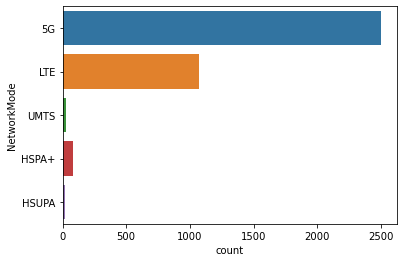

In [125]:
sns.countplot(y=df.iloc[:,6],data=data)

<AxesSubplot:>

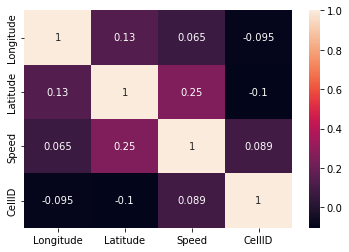

In [104]:
sns.heatmap(df.iloc[:,:6].corr(),annot=True)

In [105]:
print((data["NetworkMode"].value_counts()).sum())

18355


In [107]:
data = data.drop_duplicates()

In [59]:
print(data["LACHEX"].value_counts())

9CBA    18355
Name: LACHEX, dtype: int64


In [60]:
data = data.drop(columns=["PINGAVG", "PINGMIN", "PINGMAX", "PINGSTDEV", "PINGLOSS", "Timestamp", "Operatorname", "CELLHEX", "NRxRSRP", "NRxRSRQ", "LACHEX"])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 3701
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Longitude    18355 non-null  float64
 1   Latitude     18355 non-null  float64
 2   Speed        18355 non-null  int64  
 3   CellID       18355 non-null  int64  
 4   NetworkMode  18355 non-null  object 
 5   RSRP         18355 non-null  int64  
 6   RSRQ         18355 non-null  object 
 7   SNR          18355 non-null  object 
 8   CQI          18355 non-null  object 
 9   RSSI         18355 non-null  object 
 10  DL_bitrate   18355 non-null  int64  
 11  UL_bitrate   18355 non-null  int64  
 12  State        18355 non-null  object 
 13  NODEHEX      18355 non-null  object 
 14  RAWCELLID    18355 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 2.2+ MB


In [63]:
missingval = data.columns[data.isna().any()].tolist()

for col in missingval:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [227]:
colwdash = ['RSSI']  # replace with actual column names

# Convert columns to numeric data type
data[colwdash] = data[colwdash].apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())

In [228]:
data.head()

,Longitude,Latitude,Speed,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NODEHEX,RAWCELLID
0,-8.388349,51.935630,0,12,5G,-102,-14,2.0,4,-74.063739,0,0,I,A81B,11016972
1,-8.388349,51.935630,0,12,5G,-102,-14,2.0,4,-74.063739,35,10,D,A81B,11016972
2,-8.388284,51.935597,0,12,5G,-102,-14,2.0,4,-74.063739,35,10,D,A81B,11016972
3,-8.388284,51.935597,0,12,5G,-100,-16,9.0,4,-74.063739,0,0,D,A81B,11016972
4,-8.388284,51.935597,0,12,5G,-100,-16,9.0,4,-74.063739,215,66,D,A81B,11016972


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 3701
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Longitude    18355 non-null  float64
 1   Latitude     18355 non-null  float64
 2   Speed        18355 non-null  int64  
 3   CellID       18355 non-null  int64  
 4   NetworkMode  18355 non-null  object 
 5   RSRP         18355 non-null  int64  
 6   RSRQ         18355 non-null  object 
 7   SNR          18355 non-null  object 
 8   CQI          18355 non-null  object 
 9   RSSI         18355 non-null  float64
 10  DL_bitrate   18355 non-null  int64  
 11  UL_bitrate   18355 non-null  int64  
 12  State        18355 non-null  object 
 13  NODEHEX      18355 non-null  object 
 14  RAWCELLID    18355 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 2.2+ MB


In [230]:
print(data["State"].value_counts())

I    10487
D     7868
Name: State, dtype: int64


In [231]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [232]:
print(data["State"].value_counts())

1    10487
0     7868
Name: State, dtype: int64


In [233]:
data = pd.get_dummies(data, columns=["NODEHEX"])

In [235]:
data.value_counts()

Longitude  Latitude   Speed  CellID  NetworkMode  RSRP  RSRQ  SNR   CQI  RSSI        DL_bitrate  UL_bitrate  State  RAWCELLID  NODEHEX_432AE  NODEHEX_A4DF  NODEHEX_A4E8  NODEHEX_A4EF  NODEHEX_A81B  NODEHEX_A99B  NODEHEX_A9AA
-8.448522  51.916954  39     2       LTE          -96   -13   0.0   7    -78.000000  0           0           1      70430210   1              0             0             0             0             0             0               5
-8.484686  51.897246  33     11      5G           -95   -20   -8.0  6    -74.063739  0           0           1      11119115   0              0             0             0             0             0             1               5
-8.394723  51.886283  1      11      5G           -100  -11   6.0   12   -83.000000  0           0           1      10805003   0              1             0             0             0             0             0               4
                                                        -12   4.0   13   -83.000000  

In [236]:
#data = pd.get_dummies(data, columns=["NetworkMode"])

In [237]:
#data['NODEHEX'] = data['NODEHEX'].astype(float)
#data['RSRQ'] = data['RSRQ'].astype(float)
#data['SNR'] = data['SNR'].astype(float)
#data['CQI'] = data['CQI'].astype(float)

In [238]:
#data['NODEHEX'] = pd.to_numeric(data['NODEHEX'], errors='coerce')

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 3701
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Longitude      18355 non-null  float64
 1   Latitude       18355 non-null  float64
 2   Speed          18355 non-null  int64  
 3   CellID         18355 non-null  int64  
 4   NetworkMode    18355 non-null  object 
 5   RSRP           18355 non-null  int64  
 6   RSRQ           18355 non-null  object 
 7   SNR            18355 non-null  object 
 8   CQI            18355 non-null  object 
 9   RSSI           18355 non-null  float64
 10  DL_bitrate     18355 non-null  int64  
 11  UL_bitrate     18355 non-null  int64  
 12  State          18355 non-null  int64  
 13  RAWCELLID      18355 non-null  int64  
 14  NODEHEX_432AE  18355 non-null  uint8  
 15  NODEHEX_A4DF   18355 non-null  uint8  
 16  NODEHEX_A4E8   18355 non-null  uint8  
 17  NODEHEX_A4EF   18355 non-null  uint8  
 18  NODEHEX

In [240]:
#value = 'I'
#try:
#    float_value = float(value)
#except ValueError:
#    # Handle non-numeric values appropriately
#    float_value = None
#print(float_value)

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = data.drop("NetworkMode", axis=1)
y = data["NetworkMode"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [243]:
print(data["NetworkMode"].value_counts())

5G     15702
LTE     2653
Name: NetworkMode, dtype: int64


In [244]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [245]:
y_pred = rf.predict(X_test)

In [246]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8553527649141923


In [249]:
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


In [124]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [125]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

ValueError: pos_label=1 is not a valid label. It should be one of ['5G', 'LTE']

In [138]:
n=1000 #number of iterations
alpha=0.01
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
        for j in range(k):
            beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
            print(beta)

TypeError: can't multiply sequence by non-int of type 'float'